In [20]:
import os
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model


In [5]:
import zipfile
with zipfile. ZipFile("Pattern_recognition.zip","r") as zip_ref:
    zip_ref.extractall("Pattern_recognition")                       # Extracts data from zipfile and saves it in folder Brain_tumor

In [80]:
# Train data

batch = 64
train_datagen = ImageDataGenerator(validation_split=0.2,
                                   width_shift_range=0.2,   
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='constant')    

training_set = train_datagen.flow_from_directory('Pattern_recognition/Dataset/train',
                                                 target_size = (227, 227),
                                                 shuffle= True,
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                subset = 'training')

# Validation data

validation_datagen = ImageDataGenerator(validation_split=0.2)

validation_set = validation_datagen.flow_from_directory('Pattern_recognition/Pattern_recognition/Dataset/train/', 
                                                              target_size=(227,227), 
                                                              shuffle=False, 
                                                              class_mode='categorical', 
                                                              batch_size=batch,
                                                              subset = 'validation'
                                                            )
# Test data

test_datagen = ImageDataGenerator()
test_set = test_datagen.flow_from_directory('Pattern_recognition/Pattern_recognition/Dataset/test/',
                                            target_size = (227, 227),
                                            shuffle = False,
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 354 images belonging to 4 classes.
Found 86 images belonging to 4 classes.
Found 30 images belonging to 4 classes.


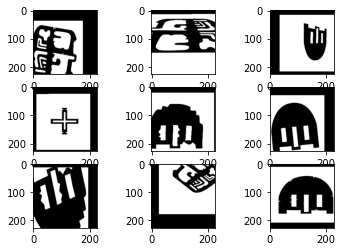

In [72]:
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = training_set.next()[0]
    image = batch[0].astype('uint8')
    # print(training_set.category.next())
    plt.imshow(image)
plt.show()
# training_set.indices

In [12]:
#IMPLEMENTING ALEXNET using keras sequential model


import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization,LayerNormalization

# here we are using 'BatchNormalization' instead of 'LayerNormalization'


# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())


# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


# Passing it to a dense layer
model.add(Flatten())


# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))


# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))

# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

#  output Layer 
model.add(Dense(4))

model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_8 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_9 (Activation)    (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)      

In [13]:

# Callback
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,verbose=1)
]


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training and saving the model with least valiation loss

history = model.fit(
        training_set,
        steps_per_epoch = training_set.samples // batch,
        epochs=100,
        callbacks = callbacks_list,
        validation_data=validation_set,
        verbose = 1,
        validation_steps=validation_set.samples // batch)

Epoch 1/100
5/5 [==============================] - 6s 931ms/step - loss: 2.3803 - accuracy: 0.4235 - val_loss: 2542.7654 - val_accuracy: 0.3281

Epoch 00001: val_loss improved from inf to 2542.76538, saving model to model.h5
Epoch 2/100
5/5 [==============================] - 3s 591ms/step - loss: 1.2715 - accuracy: 0.8678 - val_loss: 7998.5420 - val_accuracy: 0.3281

Epoch 00002: val_loss did not improve from 2542.76538
Epoch 3/100
5/5 [==============================] - 3s 588ms/step - loss: 1.4163 - accuracy: 0.8039 - val_loss: 12021.9883 - val_accuracy: 0.3281

Epoch 00003: val_loss did not improve from 2542.76538
Epoch 4/100
5/5 [==============================] - 3s 703ms/step - loss: 2.0112 - accuracy: 0.7552 - val_loss: 10338.2129 - val_accuracy: 0.3281

Epoch 00004: val_loss did not improve from 2542.76538
Epoch 5/100
5/5 [==============================] - 3s 692ms/step - loss: 1.5825 - accuracy: 0.7712 - val_loss: 5140.6445 - val_accuracy: 0.3281

Epoch 00005: val_loss did not i

In [83]:
loaded_model = tf.keras.models.load_model('model.h5')
result = loaded_model.fit(test_set)

1/1 [==============================] - 1s 768ms/step - loss: 0.0313 - accuracy: 1.0000


/srv/conda/envs/saturn/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

  category 1       1.00      1.00      1.00         5
  category 2       1.00      1.00      1.00         9
  category 3       1.00      1.00      1.00        11
  category 4       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



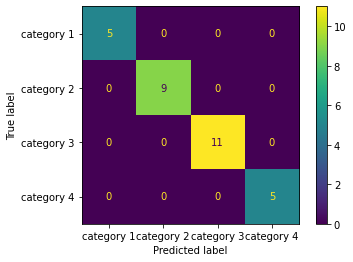

In [84]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np

loaded_model = tf.keras.models.load_model('model.h5')

classes = list(test_set.class_indices.keys())
#On test dataset
Y_pred = loaded_model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)

#Confution Matrix
cm = confusion_matrix(test_set.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
#Classification Report

print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=classes))
disp.plot()
plt.show()
